# Introduction

Notebook to analyze the **General Results** for each model in the context of traceability between test cases and bug reports.

# Load Libraries and Datasets

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from modules.models_runner.tc_br_models_runner import TC_BR_Runner
from modules.utils import model_evaluator as m_eval
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import tokenizers as tok

import warnings; warnings.simplefilter('ignore')

# Run All Models

## Volunteers Only Strategy

In [2]:
models_runner_4 = TC_BR_Runner()
lsi_model_4 = models_runner_4.run_lsi_model()
lda_model_4 = models_runner_4.run_lda_model()
bm25_model_4 = models_runner_4.run_bm25_model()
w2v_model_4 = models_runner_4.run_word2vec_model()

oracle=fd.Tc_BR_Oracles.read_oracle_volunteers_df()

evaluator_4 = m_eval.ModelEvaluator(oracle)
evals_df_4 = evaluator_4.run_evaluator(models=[lsi_model_4,lda_model_4,bm25_model_4,w2v_model_4],
                                       top_values=[10,20,40], 
                                       sim_thresholds=[(sm.SimilarityMeasure.COSINE, x/10) for x in range(0,10)])

TestCases.shape: (195, 12)
SelectedBugReports.shape: (91, 18)
Running LSI Model ------
Running LDA Model -----
Running BM25 Model -----
Running W2V Model ------
OracleVolunteers.shape: (195, 91)
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Load Datasets

In [3]:
bugreports = fd.Datasets.read_selected_bugreports_df()
testcases = fd.Datasets.read_testcases_df()

SelectedBugReports.shape: (91, 18)
TestCases.shape: (195, 12)


### Tokenization

In [4]:
tokenizer = tok.PorterStemmerBased_Tokenizer()
bugreports['tokens'] = bugreports.apply(lambda row : tokenizer.__call__(row['br_desc']), axis=1)
testcases['tokens'] = testcases.apply(lambda row : tokenizer.__call__(row['tc_desc']), axis=1)

### Results

In [5]:
evals_df_4.head()

model           ref_name  perc_precision  perc_recall  perc_fscore  \
0   lsi  top_10_cosine_0.0           33.08        23.46        26.09   
1   lsi  top_10_cosine_0.1           33.08        23.46        26.09   
2   lsi  top_10_cosine_0.2           33.08        23.46        26.09   
3   lsi  top_10_cosine_0.3           33.08        23.46        26.09   
4   lsi  top_10_cosine_0.4           32.99        23.28        25.97   

                                             eval_df  sim_threshold   top  \
0                  precision    recall    fscore
...            0.0  10.0   
1                  precision    recall    fscore
...            0.1  10.0   
2                  precision    recall    fscore
...            0.2  10.0   
3                  precision    recall    fscore
...            0.3  10.0   
4                  precision    recall    fscore
...            0.4  10.0   

                                      trace_links_df  
0  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
1  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
2  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
3  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...  
4  br_name     BR_1248267_SRC  BR_1248268_SRC  BR...

## General Evaluation

### Mean Document Lengths

In [14]:
mean_test_cases_length = testcases.tokens.apply(lambda x : len(x)).median()
mean_bug_reports_length = bugreports.tokens.apply(lambda x : len(x)).median()

print("Mean TC length: {:.4}".format(mean_test_cases_length))
print("Mean BR length: {:.4}".format(mean_bug_reports_length))

Mean TC length: 60.0
Mean BR length: 66.0


(array([19., 22., 23., 16.,  5.,  2.,  2.,  1.,  0.,  1.]),
 array([ 19. ,  41.1,  63.2,  85.3, 107.4, 129.5, 151.6, 173.7, 195.8,
        217.9, 240. ]),
 <a list of 10 Patch objects>)

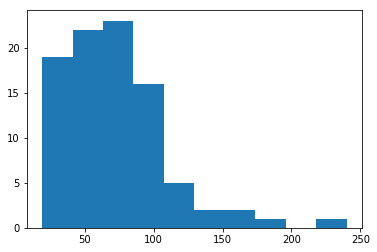

In [12]:
display(plt.hist(bugreports.tokens.apply(lambda x : len(x))))

(array([29., 66., 59., 21.,  7.,  9.,  3.,  0.,  0.,  1.]),
 array([ 19. ,  38.6,  58.2,  77.8,  97.4, 117. , 136.6, 156.2, 175.8,
        195.4, 215. ]),
 <a list of 10 Patch objects>)

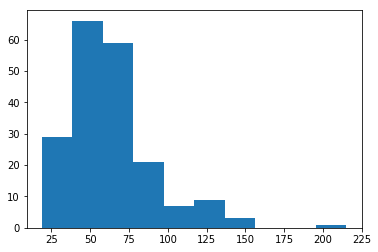

In [11]:
display(plt.hist(testcases.tokens.apply(lambda x : len(x))))

## Word Vector Analysis

In [9]:
aux_functions.highlight_df(w2v_model_4.get_sim_matrix())

In [10]:
vals = []
df = w2v_model_4.get_sim_matrix()
for idx,row in df.iterrows():
    for col in df.columns:
        vals.append(df.at[idx,col])

print("mean: {:2.2}".format(pd.Series(vals).mean()))
print("median: {:2.2}".format(pd.Series(vals).median()))
print("std: {:2.2}".format(pd.Series(vals).std()))

mean: 0.91
median: 0.91
std: 0.035


## LDA Analysis

In [6]:
lda_model_4.print_topics()

Topic #0: custom tab video toolbar link control drop item devic open
Topic #1: choos question display toolbar content ani close bookmark bar remov
Topic #2: widevin webm eme video support start load choos play web
Topic #3: download dropmak panel file click open item folder button icon
Topic #4: choos question display toolbar content ani close bookmark bar remov
Topic #5: pdf consol file browser theme child mode select use viewer
Topic #6: scroll mous apz make true sure config async wireless wire
Topic #7: icon awesom reader narrat speech bar display correctli mode text
Topic #8: choos question display toolbar content ani close bookmark bar remov
Topic #9: choos question display toolbar content ani close bookmark bar remov
Topic #10: bookmark toolbar desktop option warn work expect avail button tri
Topic #11: context menu page imag bring link option thi question open
Topic #12: text select field previou ha anoth differ keyboard left default
Topic #13: zoom indic bar locat key page disp

In [7]:
lda_model_4.get_sim_matrix()

br_name     BR_1248267_SRC  BR_1248268_SRC  BR_1257087_SRC  BR_1264988_SRC  \
tc_name                                                                      
TC_13_TRG         0.126582        0.105046        0.276218        0.221710   
TC_14_TRG         0.317495        0.252128        0.303893        0.168187   
TC_15_TRG         0.109150        0.101071        0.240433        0.171051   
TC_16_TRG         0.113487        0.106775        0.235548        0.170323   
TC_17_TRG         0.110505        0.107775        0.205606        0.154007   
TC_18_TRG         0.107986        0.099673        0.239316        0.169901   
TC_19_TRG         0.127082        0.106098        0.243428        0.222032   
TC_20_TRG         0.105766        0.097004        0.237182        0.167706   
TC_21_TRG         0.103972        0.094849        0.235455        0.165932   
TC_22_TRG         0.186272        0.119354        0.243657        0.401357   
TC_23_TRG         0.294409        0.127377        0.203604        0.447749   
TC_24_TRG         0.132994        0.109143        0.241430        0.261826   
TC_25_TRG         0.310281        0.273335        0.612967        0.315569   
TC_26_TRG         0.049170        0.171814        0.048568        0.373239   
TC_27_TRG         0.085222        0.180400        0.060489        0.456263   
TC_28_TRG         0.101409        0.206007        0.069479        0.388805   
TC_29_TRG         0.117437        0.180317        0.063190        0.554845   
TC_30_TRG         0.051111        0.174075        0.050657        0.374978   
TC_31_TRG         0.166219        0.250842        0.281536        0.375269   
TC_32_TRG         0.401515        0.372734        0.180104        0.350636   
TC_33_TRG         0.081348        0.532385        0.160519        0.315590   
TC_34_TRG         0.138236        0.532514        0.174243        0.449917   
TC_35_TRG         0.115345        0.545202        0.170492        0.414930   
TC_36_TRG         0.053321        0.175739        0.052726        0.375219   
TC_37_TRG         0.124125        0.075906        0.284153        0.263490   
TC_38_TRG         0.202524        0.140236        0.299753        0.261508   
TC_39_TRG         0.142286        0.094110        0.297545        0.234254   
TC_40_TRG         0.133486        0.095307        0.283540        0.324891   
TC_41_TRG         0.113804        0.072145        0.284585        0.235483   
TC_42_TRG         0.127607        0.074929        0.281329        0.278010   
...                    ...             ...             ...             ...   
TC_178_TRG        0.210850        0.069902        0.062347        0.060418   
TC_179_TRG        0.205951        0.063487        0.056685        0.054847   
TC_180_TRG        0.073123        0.392173        0.056229        0.743627   
TC_181_TRG        0.055077        0.396040        0.055242        0.699228   
TC_182_TRG        0.057770        0.414571        0.061964        0.688730   
TC_183_TRG        0.100333        0.388091        0.061934        0.670783   
TC_184_TRG        0.081349        0.381543        0.081388        0.635189   
TC_185_TRG        0.055498        0.392852        0.055248        0.687741   
TC_186_TRG        0.053386        0.390774        0.053037        0.686384   
TC_187_TRG        0.052713        0.390111        0.052333        0.685949   
TC_188_TRG        0.052041        0.389448        0.051630        0.685514   
TC_189_TRG        0.067690        0.423272        0.067184        0.769605   
TC_190_TRG        0.074246        0.377294        0.073965        0.635858   
TC_191_TRG        0.079192        0.379850        0.079000        0.638551   
TC_192_TRG        0.063046        0.403602        0.077375        0.703342   
TC_193_TRG        0.070679        0.391519        0.055234        0.738343   
TC_194_TRG        0.079986        0.395133        0.060674        0.685727   
TC_195_TRG        0.118962        0.379844        0.065094        0.651258   
TC_196_TRG        0.09

In [8]:
aux_functions.highlight_df(lda_model_4.get_sim_matrix().loc[:,
                                 ['BR_1357458_SRC',
                                  'BR_1297976_SRC',
                                  'BR_1353831_SRC',
                                  'BR_1297374_SRC',
                                  'BR_1352539_SRC']])